In [118]:
import os
from tabulate import tabulate
from glob import iglob
import pandas as pd
from joblib import dump, load
import pickle
from typing import Union, BinaryIO

import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
with open("../models/test_summary.txt", "r") as file:
    summary = file.readlines()
for line in summary:
    if line.startswith("\n"):
        summary.remove(line)


In [116]:
table = [["Feature", "Target", "KNN Accuracry", "XGBoost Accuracy"]]
output = []
for line in range(len(summary)):
    if summary[line].startswith("F"):
        feat = summary[line].split()[-1]
        targ = summary[line+1].split()[-1]
        knn = summary[line+2].split()[-1]
        xgb = summary[line+3].split()[-1]
        table.append([feat, targ, knn, xgb])
print(tabulate(table, headers='firstrow', tablefmt='github'))

| Feature    | Target                    |   KNN Accuracry |   XGBoost Accuracy |
|------------|---------------------------|-----------------|--------------------|
| avg_3rds   | Cooler_Condition          |        1        |           1        |
| avg_change | Cooler_Condition          |        0.924471 |           0.987915 |
| cycle_mean | Cooler_Condition          |        1        |           1        |
| dx_3rds    | Cooler_Condition          |        0.927492 |           0.996979 |
| std_3rds   | Cooler_Condition          |        0.996979 |           0.990937 |
| std_dev    | Cooler_Condition          |        0.990937 |           0.990937 |
| avg_3rds   | Hydraulic_accumulator_bar |        0.963746 |           0.987915 |
| avg_change | Hydraulic_accumulator_bar |        0.818731 |           0.963746 |
| cycle_mean | Hydraulic_accumulator_bar |        0.963746 |           0.969789 |
| dx_3rds    | Hydraulic_accumulator_bar |        0.670695 |           0.942598 |
| std_3rds   | H

| Feature    | Target                    |   KNN Accuracry |   XGBoost Accuracy |
|------------|---------------------------|-----------------|--------------------|
| avg_3rds   | Cooler_Condition          |        1        |           1        |
| avg_change | Cooler_Condition          |        0.924471 |           0.987915 |
| cycle_mean | Cooler_Condition          |        1        |           1        |
| dx_3rds    | Cooler_Condition          |        0.927492 |           0.996979 |
| std_3rds   | Cooler_Condition          |        0.996979 |           0.990937 |
| std_dev    | Cooler_Condition          |        0.990937 |           0.990937 |
| avg_3rds   | Hydraulic_accumulator_bar |        0.963746 |           0.987915 |
| avg_change | Hydraulic_accumulator_bar |        0.818731 |           0.963746 |
| cycle_mean | Hydraulic_accumulator_bar |        0.963746 |           0.969789 |
| dx_3rds    | Hydraulic_accumulator_bar |        0.670695 |           0.942598 |
| std_3rds   | Hydraulic_accumulator_bar |        0.930514 |           0.975831 |
| std_dev    | Hydraulic_accumulator_bar |        0.8429   |           0.915408 |
| avg_3rds   | Internal_pump_leakage     |        0.990937 |           0.996979 |
| avg_change | Internal_pump_leakage     |        0.697885 |           0.854985 |
| cycle_mean | Internal_pump_leakage     |        0.990937 |           0.987915 |
| dx_3rds    | Internal_pump_leakage     |        0.646526 |           0.794562 |
| std_3rds   | Internal_pump_leakage     |        0.92145  |           0.969789 |
| std_dev    | Internal_pump_leakage     |        0.963746 |           0.984894 |
| avg_3rds   | stable_flag               |        0.966767 |           0.963746 |
| avg_change | stable_flag               |        0.827795 |           0.942598 |
| cycle_mean | stable_flag               |        0.963746 |           0.966767 |
| dx_3rds    | stable_flag               |        0.800604 |           0.912387 |
| std_3rds   | stable_flag               |        0.957704 |           0.969789 |
| std_dev    | stable_flag               |        0.954683 |           0.969789 |
| avg_3rds   | Valve_Condition           |        0.984894 |           0.987915 |
| avg_change | Valve_Condition           |        0.465257 |           0.504532 |
| cycle_mean | Valve_Condition           |        0.918429 |           0.97281  |
| dx_3rds    | Valve_Condition           |        0.44713  |           0.483384 |
| std_3rds   | Valve_Condition           |        0.694864 |           0.933535 |
| std_dev    | Valve_Condition           |        0.752266 |           0.960725 |

| Feature    |   Target                  |   KNN Accuracry |   XGBoost Accuracy |
|   :---:    |          :---:            |      :---:      |        :---:       |
| St   | Cooler_Condition          |        0.996979 |           0.996979 |
| avg_3rds   | Hydraulic_accumulator_bar |        0.963746 |           0.987915 |
| avg_3rds   | Internal_pump_leakage     |        0.990937 |           0.996979 |
| avg_3rds   | stable_flag               |        0.966767 |           0.963746 |
| avg_3rds   | Valve_Condition           |        0.984894 |           0.987915 |

In [1]:
run "../src/RegularModel.py"

In [4]:
model = load("../models/Internal_pump_leakage_avg_3rds.pkl")

In [40]:
feature_importances = model.xgb_grid_search.best_estimator_.steps[1][1].feature_importances_
feature_columns = model._X_train.columns
fi_list = list(filter(lambda x : x[1] > 0, zip(feature_columns, feature_importances)))
fi_list.sort(reverse=True, key = lambda x : x[1])
for col, num in fi_list:
#     if count == 3:
#         print("\n")
#         count = 0
    print(f"{col}: {num:5f}")
#     count += 1

mean_FS1_2: 0.295784
mean_SE_3: 0.263202
mean_EPS1_1: 0.138062
mean_TS1_3: 0.103163
mean_PS2_2: 0.036164
mean_PS1_2: 0.036125
mean_PS1_3: 0.035623
mean_TS2_1: 0.025716
mean_EPS1_2: 0.019335
mean_FS1_3: 0.016336
mean_TS1_1: 0.012312
mean_VS1_2: 0.002524
mean_VS1_3: 0.002438
mean_TS2_2: 0.002181
mean_PS2_1: 0.001697
mean_VS1_1: 0.001256
mean_PS2_3: 0.001090
mean_CE_1: 0.000837
mean_EPS1_3: 0.000701
mean_TS2_3: 0.000652
mean_SE_2: 0.000639
mean_TS1_2: 0.000632
mean_FS2_3: 0.000625
mean_FS2_2: 0.000615
mean_PS3_3: 0.000548
mean_CP_1: 0.000477
mean_PS3_1: 0.000370
mean_PS6_1: 0.000306
mean_PS1_1: 0.000301
mean_SE_1: 0.000289


In [59]:
def feature_importance(file_path:str):
    model = load(file_path)
    feature_importances = model.xgb_grid_search.best_estimator_.steps[1][1].feature_importances_
    feature_columns = model._X_train.columns
    fi_list = list(filter(lambda x : x[1] > 0, zip(feature_columns, feature_importances)))
    fi_list.sort(reverse=True, key = lambda x : x[1])
    return fi_list

In [129]:
final_pairs = ['Cooler_Condition_std_3rds', 'Hydraulic_accumulator_bar_avg_3rds', 'Internal_pump_leakage_avg_3rds', 'stable_flag_avg_3rds', 'Valve_Condition_avg_3rds']

In [124]:
# files = [file for file in iglob("../models/*.pkl") if os.path.basename(file)[:-4] in final_pairs]

def get_feature_counts(sensor_info:str="./**/sensor_info.pkl", model_search:str="", top:int=5):
    with open(sensor_info, "rb") as file:
        sensors = pickle.load(file)
        col_names = sensors.keys() 
    files = [file for file in iglob(model_search)]
    feature_counts= {}
    for file in files:
        pair = os.path.basename(file)[:-4]
        fi = feature_importance(file)[:top]
    #     print(f"\n{pair}:")
        for name, itm in fi:
            name = name.split("_")
            feature = [word for word in name if word in col_names]
    #         print(f"{next(feature)}: {itm:.5f}")
            if feature[0] in feature_counts.keys():
                feature_counts[feature[0]] += 1
                continue
            feature_counts.update({feature[0]: 1})

    features = list(feature_counts.items())
    features.sort(reverse=True, key=lambda x : x[1])
    feature_ids, feature_count = [[k for k, v in features],
                 [v for k, v in features]]
    return (feature_ids, feature_count)

In [133]:
targets = ['Cooler_Condition*', 'Hydraulic_accumulator_bar*', 'Internal_pump_leakage*', 'stable_flag*', 'Valve_Condition*']

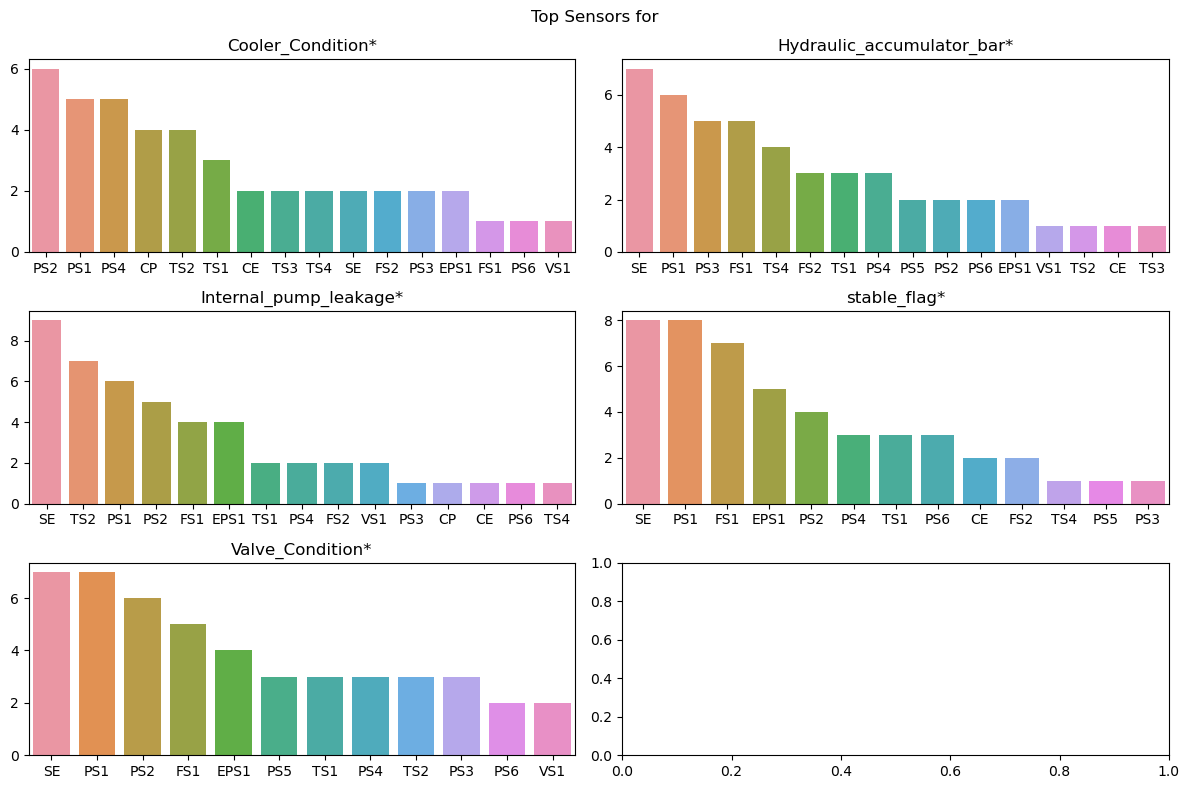

In [149]:
ax_num = (divmod(num, 2) for num in range(10))
fig, ax = plt.subplots(3, 2, figsize=(12,8), tight_layout="tight")
for model in targets:
    ax_i = ax[next(ax_num)]
    path = f"../models/{model}.pkl"
    x, y = get_feature_counts("../features/sensor_info.pkl", path, top=8)
#     print(x, y)
    sns.barplot(x=x, y=y, ax=ax_i)
    plt.suptitle("Top Sensors for")
    ax_i.set_title(model)
    # plt.yticks(range(0, 30, 2))
plt.show()

In [203]:
def get_feature_avg(sensor_info:str="./**/sensor_info.pkl", model_search:str="", top:int=5):
    with open(sensor_info, "rb") as file:
        sensors = pickle.load(file)
        col_names = sensors.keys() 
    files = [file for file in iglob(model_search)]
    feature_counts= {}
    for file in files:
        pair = os.path.basename(file)[:-4]
        fi = feature_importance(file)[:top]
    #     print(f"\n{pair}:")
        for name, itm in fi:
            name = name.split("_")
#             feature = [word for word in name if word in col_names]
            feature = [name[ind] for ind in range(len(name)) if name[ind].isupper()]
            if not name[-1] == feature[0]:
                feature[0] = (feature[0], name[-1])
#             feature = [name[ind+1] for ind in range(len(name)) if name[ind].isupper()]
#             print(f"{next(feature)}: {itm:.5f}")
            if feature[0] in feature_counts.keys():
                feature_counts[feature[0]].append(itm)
                continue
            feature_counts.update({feature[0]: [itm]})

    features = list(feature_counts.items())
    features.sort(reverse=True, key=lambda x : x[1])
    feature_ids, feature_arr = [[k for k, v in features],
                 [v for k, v in features]]
    feature_avg = []
    for arr in feature_arr:
        feature_avg.append(np.mean(arr))
    return feature_ids, feature_avg

In [204]:
name, avg = get_feature_avg("../features/sensor_info.pkl", "../models/*.pkl", top=10)

In [210]:
def name_filter(x):
    if isinstance(x, tuple):
        return int(x[1])
    return 0

In [225]:
period = name
x = list(zip(period, avg))
x.sort(reverse=True, key=lambda x : x[1])
zero, one, two, three = [[(zero, avg) for zero, avg in x if len(zero) < 2],
                         [(one, avg) for one, avg in x if one[1] == '1'],
                         [(two, avg) for two, avg in x if two[1] == '2'],
                         [(three, avg) for three, avg in x if three[1] == '3']]


([],
 [(('TS1', '1'), 0.12870742),
  (('EPS1', '1'), 0.10662965),
  (('SE', '1'), 0.088047385),
  (('FS1', '1'), 0.08013861),
  (('PS4', '1'), 0.06808045),
  (('PS5', '1'), 0.04343231),
  (('PS1', '1'), 0.039662875),
  (('TS4', '1'), 0.03904135),
  (('PS2', '1'), 0.037859865),
  (('CE', '1'), 0.0361591),
  (('FS2', '1'), 0.03408581),
  (('PS3', '1'), 0.03300824),
  (('TS2', '1'), 0.032258857),
  (('VS1', '1'), 0.031809665),
  (('CP', '1'), 0.027117696)],
 [(('FS1', '2'), 0.1557509),
  (('PS2', '2'), 0.13012569),
  (('EPS1', '2'), 0.07211589),
  (('SE', '2'), 0.054280285),
  (('PS5', '2'), 0.04842399),
  (('PS3', '2'), 0.040074892),
  (('TS4', '2'), 0.039173167),
  (('TS2', '2'), 0.03789159),
  (('PS6', '2'), 0.03725287),
  (('TS1', '2'), 0.037049565),
  (('PS1', '2'), 0.03642851),
  (('PS4', '2'), 0.035745364),
  (('CE', '2'), 0.024931092)],
 [(('CE', '3'), 0.36857525),
  (('CP', '3'), 0.30823955),
  (('PS4', '3'), 0.2176693),
  (('TS3', '3'), 0.09411573),
  (('SE', '3'), 0.076099925),